# Clustering K-Means

In [1]:
def group_assignment(data,centroids):
    grouping_vec_c = np.zeros(len(data))

    for i in range(len(data)):
        dist = np.zeros(len(centroids))

        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])

        min_dist = min(dist)

        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1

    return grouping_vec_c

In [2]:
def update_centroid(data, grouping, centroids):
    new_centroids = []

    for i in range(len(centroids)):
        cent = 0
        count = 0

        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent += data[j]
                count += 1

        group_average = cent/count
        new_centroids.append(group_average)

    return new_centroids

In [3]:
def clustering_objective(data, grouping, centroids):
    J_obj = 0

    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])

    J_obj = J_obj/len(data)
    return J_obj

In [4]:
def Kmeans_alg(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False

    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping,new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1

        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            centroids = new_centroids

    return new_centroids, grouping, J_obj_vector, iteration

In [5]:
import matplotlib.pyplot as plt
import numpy as np

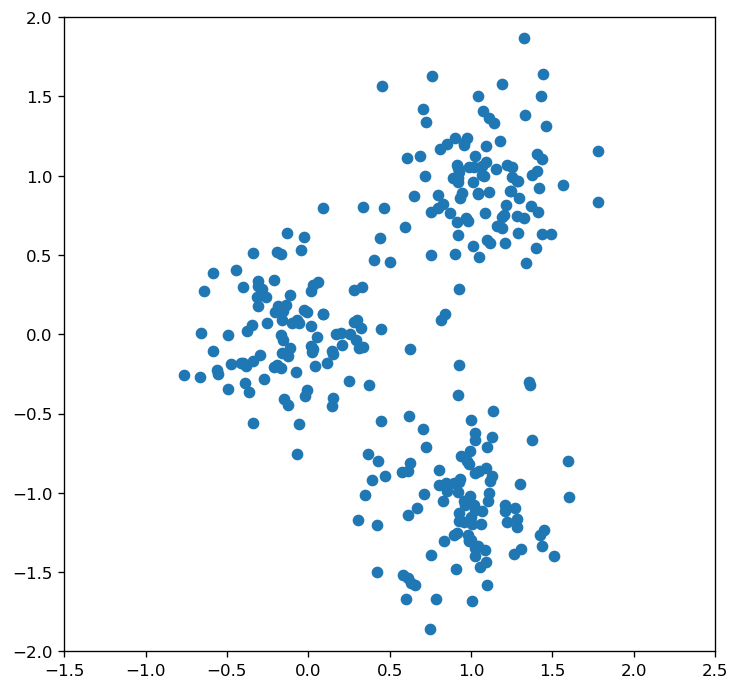

In [6]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],\
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)], \
                    [[1,-1]+ 0.3* np.random.randn(2) for i in range(100)]])
ax.scatter( X[:,0],X[:,1])
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.show()

In [7]:
A = Kmeans_alg(X,X[:3])

In [8]:
len(A)

4

In [9]:
A[0]

[array([-0.10979377,  0.00673361]),
 array([1.06080324, 0.94191335]),
 array([ 0.9470774 , -1.06061286])]

In [10]:
A

([array([-0.10979377,  0.00673361]),
  array([1.06080324, 0.94191335]),
  array([ 0.9470774 , -1.06061286])],
 array([1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.

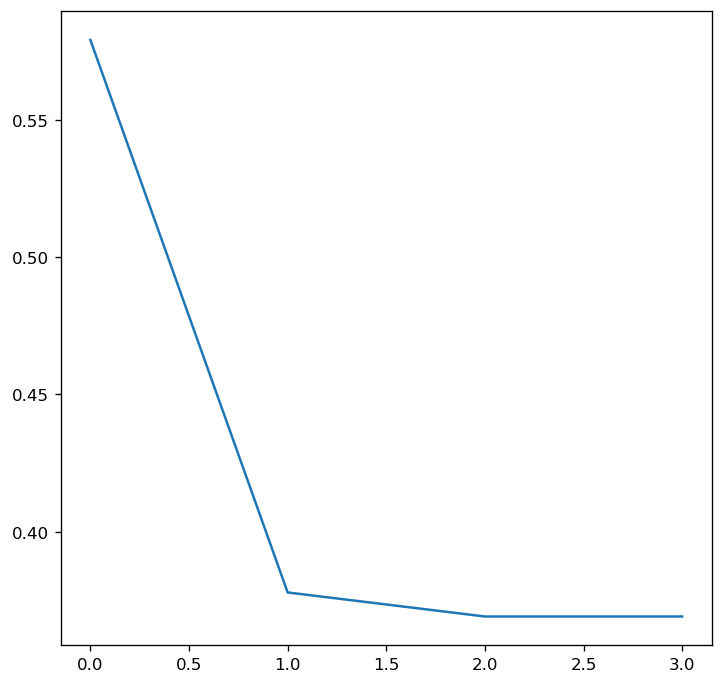

In [11]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(list(range(A[-1])),A[2])
plt.show()

In [12]:
import pandas as pd 
import seaborn as sns

In [13]:
gruping = A[1].reshape(-1,1)
arr = np.concatenate((X, gruping),axis=1)

In [14]:
df = pd.DataFrame(arr,columns=['x', 'y', 'group'])

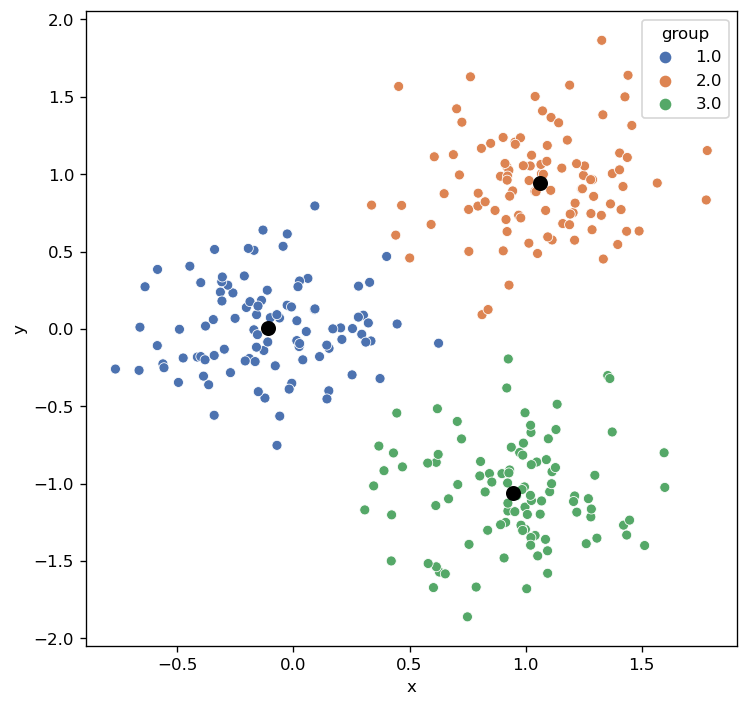

In [15]:
fig,ax= plt.subplots(1,1,figsize=(7,7),dpi=120)
sns.scatterplot(x='x',y='y',hue='group',data=df, palette='deep')
for i in A[0]:
    ax.scatter(i[0],i[1],c='black',linewidths=3)
plt.show()

In [16]:
from sklearn.datasets import fetch_openml
import random

In [17]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [18]:
import itertools
a = list(itertools.product(range(3),range(3)))
a

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [19]:
X_array = np.array(X)
X_array.shape

(70000, 784)

In [20]:
A = Kmeans_alg(X_array,random.choices(X_array,k=9))

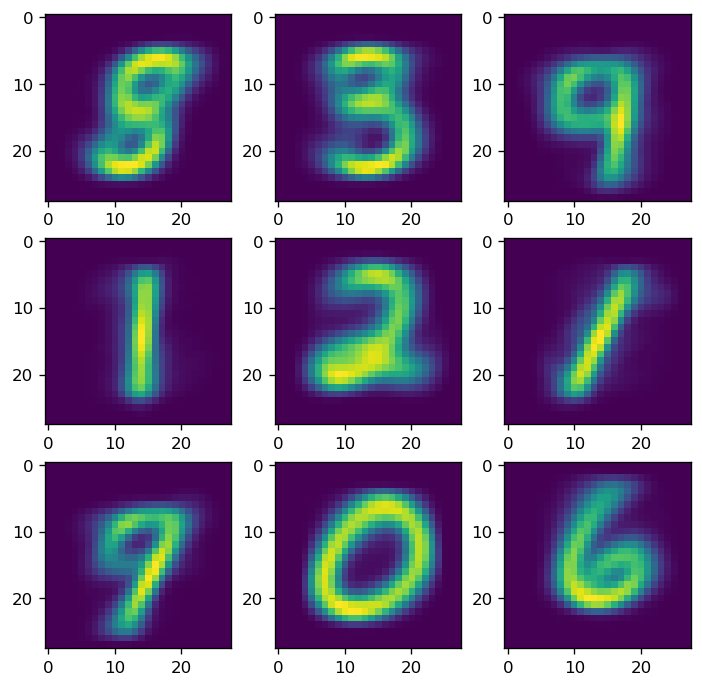

In [21]:
fig, ax = plt.subplots(3,3,figsize=(7,7),dpi=120)
for i,j in zip(a,A[0]):
        ax[i[0]][i[1]].imshow(j.reshape(28,28))
plt.show()

In [22]:
A

+02,
         1.33876330e+02, 1.60762798e+02, 1.74879709e+02, 1.63475080e+02,
         1.28212198e+02, 8.42145633e+01, 4.38891705e+01, 1.59907079e+01,
         2.94627471e+00, 1.19952695e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 9.96789998e-03, 7.21743538e-01,
         2.14891029e+01, 7.27731036e+01, 1.32672918e+02, 1.77542997e+02,
         1.90745058e+02, 1.74057104e+02, 1.46355128e+02, 1.26543335e+02,
         1.20814158e+02, 1.26405136e+02, 1.40855719e+02, 1.59210677e+02,
         1.73351580e+02, 1.77659402e+02, 1.62575266e+02, 1.28913837e+02,
         8.81444501e+01, 4.98104410e+01, 2.17452272e+01, 6.28349383e+00,
         9.71109985e-01, 3.75063355e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.90471363e-01,
         1.23375570e+01, 4.71648927e+01, 9.76928535e+01, 1.49839162e+02,
         1.86912316e+02, 2.02457172e+02, 1.98657881e+02, 1.89783916e+02,
         1.85137523e+02, 1.84943403e+02, 1.869

# Examen

In [23]:
import numpy as np
from sklearn.datasets import load_breast_cancer 
dataSet = load_breast_cancer() 
data = dataSet.data
data.shape

(569, 30)

In [24]:
A = Kmeans_alg(data,data[:2])

In [25]:
np.unique(A[1],return_counts=True)

(array([1., 2.]), array([438, 131], dtype=int64))

In [26]:
a = [ 1.95549103,  2.01534324,  1.57476236,  0.41230402, -1.64797285, -1.88712578,-1.69938709, -1.14554822, 0.74721043, 1.40194224]

b = [-2.08024322, -0.57860175,  0.4719788, 1.40672063, 2.39433809, 1.85156671,0.86200697, -0.9201432, -2.30401734,  -2.16378775]

In [27]:
datos = np.array([a,b])
df = pd.DataFrame(datos.T)

In [28]:
df.corr()

,0,1
0,1.000000,-0.646202
1,-0.646202,1.000000
